=== Original Data (X) ===
[[ 1  2]
 [ 2  3]
 [ 3  5]
 [ 5  8]
 [ 8 13]]

Mean of each feature:
x1 mean = 3.800, x2 mean = 6.200

Mean-centered Data:
[[-2.8 -4.2]
 [-1.8 -3.2]
 [-0.8 -1.2]
 [ 1.2  1.8]
 [ 4.2  6.8]]

Covariance Matrix:
[[ 7.7 12.3]
 [12.3 19.7]]

Eigenvalues (sorted):
[2.7385e+01 1.5000e-02]

Eigenvectors (columns correspond to eigenvalues):
[[ 0.53  -0.848]
 [ 0.848  0.53 ]]

Manual PCA Projection onto first principal component:
[-5.046 -3.668 -1.442  2.162  7.992]

Scikit-learn PCA projection:
[-5.046 -3.668 -1.442  2.162  7.992]

Explained Variance Ratio (sklearn PCA):
[0.999]


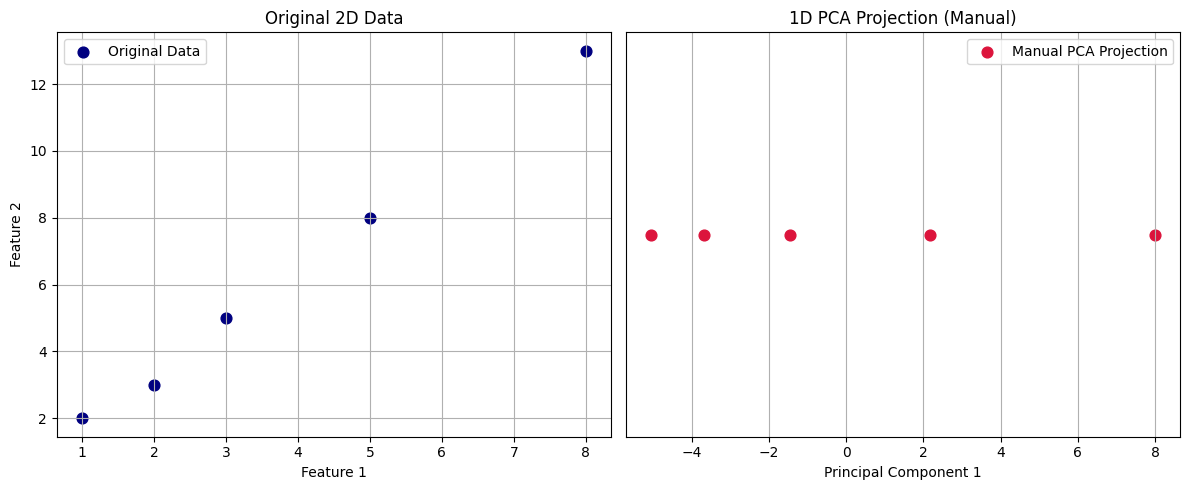

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# New sample data
X = np.array([
    [1, 2],
    [2, 3],
    [3, 5],
    [5, 8],
    [8, 13]
])

print("=== Original Data (X) ===")
print(X)

# Step 1: Center the data
mean = np.mean(X, axis=0)
X_meaned = X - mean
print("\nMean of each feature:")
print(f"x1 mean = {mean[0]:.3f}, x2 mean = {mean[1]:.3f}")

print("\nMean-centered Data:")
print(np.round(X_meaned, 3))

# Step 2: Covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)
print("\nCovariance Matrix:")
print(np.round(cov_matrix, 3))

# Step 3: Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors descending
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("\nEigenvalues (sorted):")
print(np.round(eigenvalues, 3))

print("\nEigenvectors (columns correspond to eigenvalues):")
print(np.round(eigenvectors, 3))

# Step 5: Select top k eigenvectors (k=1)
k = 1
W = eigenvectors[:, :k]

# Step 6: Project data
X_reduced_manual = X_meaned @ W

print("\nManual PCA Projection onto first principal component:")
print(np.round(X_reduced_manual.flatten(), 3))

# Using sklearn PCA for comparison
pca = PCA(n_components=1)
X_reduced_sklearn = pca.fit_transform(X)

print("\nScikit-learn PCA projection:")
print(np.round(X_reduced_sklearn.flatten(), 3))

print("\nExplained Variance Ratio (sklearn PCA):")
print(np.round(pca.explained_variance_ratio_, 3))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='navy', s=60, label='Original Data')
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_reduced_manual, np.zeros_like(X_reduced_manual), color='crimson', s=60, label='Manual PCA Projection')
plt.title("1D PCA Projection (Manual)")
plt.xlabel("Principal Component 1")
plt.yticks([])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
